In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from transformers import pipeline

In [2]:
pd.set_option('display.max_colwidth', None)

<a href="https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment">Model</a>

In [3]:
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [4]:
def get_headers(url):
  response = requests.get(url)

  if response.status_code != 200:
    print(f"Error al acceder a {url}")
    return []

  bs = BeautifulSoup(response.text, "html.parser")
  headers = bs.find_all(["h2"])

  if not headers:
    print(f"No se encontraron encabezados en {url}")
    return []

  return [header.text.strip() for header in headers if header.text.strip()]

In [5]:
paginas_webs_mas_vistas_en_espana = {
    "El Pais": "https://elpais.com/",
    "El Mundo": "https://www.elmundo.es/",
    "Marca": "https://www.marca.com/",
    "El Diario": "https://www.eldiario.es/",
    "AS": "https://as.com/",
    "La Vanguardia": "https://www.lavanguardia.com/",
    "Hola": "https://www.hola.com/",
    "Malaga Hoy": "https://www.malagahoy.es/",
    "Expansion": "https://www.expansion.com/",
    "Vandal": "https://vandal.elespanol.com/"
}

In [6]:
df = pd.DataFrame(columns=["Pagina", "Encabezado"])

In [7]:
# Creamos un diccionario con los nombres del portal de noticias junto a todos sus headers
headers_dict = {}

for pagina, url in paginas_webs_mas_vistas_en_espana.items():
    print(f"Procesando: {pagina}")
    headers = get_headers(url)
    if headers:
        headers_dict[pagina] = headers

Procesando: El Pais
Procesando: El Mundo
Procesando: Marca
Procesando: El Diario
Procesando: AS
Procesando: La Vanguardia
Procesando: Hola
Procesando: Malaga Hoy
Procesando: Expansion
Procesando: Vandal


In [8]:
# Transformamos las noticias a un dataframe
data = []

for pagina, headers in headers_dict.items():
    for header in headers:
        data.append({"Pagina": pagina, "Encabezado": header})

df = pd.DataFrame(data)

Ejemplo: Devuelve 1, 2, 3, 4 o 5 estrellas dependiendo de si es muy negativo a mas positivo respectivamente.

<ipython-input-9-3edac86723a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pagina", y="Encabezado", data=pagina_counts, palette="viridis")


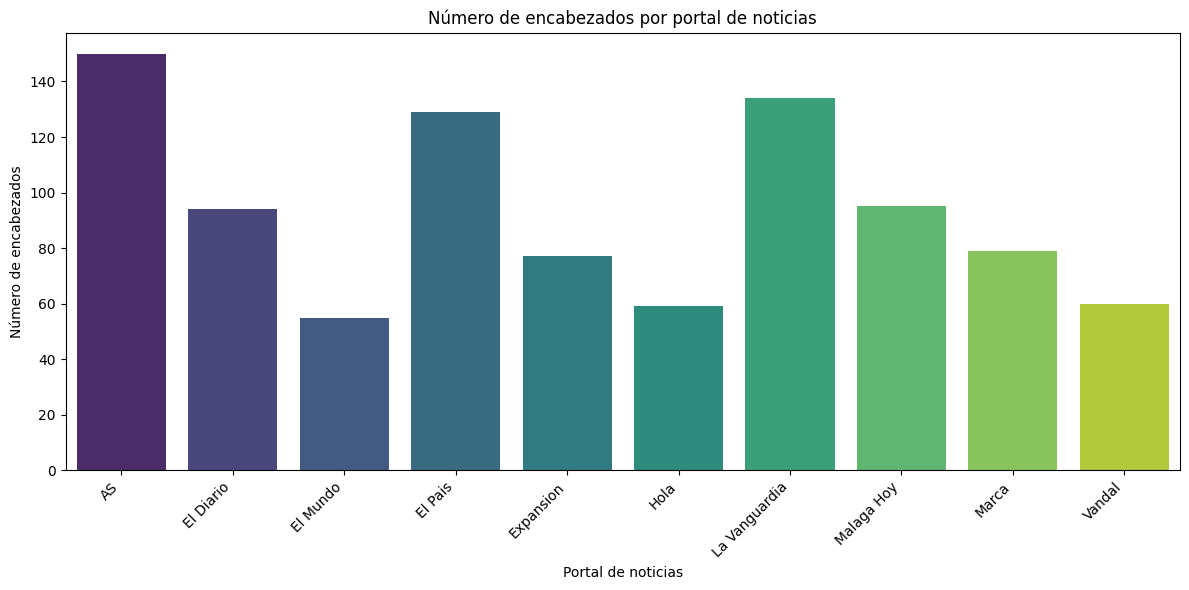

In [9]:
pagina_counts = df.groupby("Pagina")["Encabezado"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Pagina", y="Encabezado", data=pagina_counts, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Número de encabezados por portal de noticias")
plt.xlabel("Portal de noticias")
plt.ylabel("Número de encabezados")
plt.tight_layout()
plt.show()

In [10]:
# Ejemplo de como se saca las estrellas del resultado
text = "Hola"
result = classifier(text)
stars = int(result[0]['label'].split()[0])
print(result)
print(stars)

[{'label': '3 stars', 'score': 0.25504210591316223}]
3


In [11]:
def classify_sentiment(text):
    result = classifier(text) # Hacemos la prediccion del texto que pasamos
    stars = int(result[0]["label"].split()[0]) # Sacamos las estrellas que tiene la prediccion

    if stars == 1:
        return "negativo"
    elif stars == 5:
        return "positivo"
    else:
        return "neutro"

In [12]:
df["Sentimiento"] = df["Encabezado"].apply(classify_sentiment) # Aplicamos el metodo a todas las filas

In [13]:
df.head(20)

Pagina  \
0   El Pais   
1   El Pais   
2   El Pais   
3   El Pais   
4   El Pais   
5   El Pais   
6   El Pais   
7   El Pais   
8   El Pais   
9   El Pais   
10  El Pais   
11  El Pais   
12  El Pais   
13  El Pais   
14  El Pais   
15  El Pais   
16  El Pais   
17  El Pais   
18  El Pais   
19  El Pais   

                                                                                                          Encabezado  \
0                                             Canadá prepara su frontera con Estados Unidos ante el regreso de Trump   
1   China se interpone en el camino de México para la renovación de su tratado comercial con Estados Unidos y Canadá   
2   David J. Bier, experto en inmigración: “No necesitamos un muro, necesitamos reformar nuestro sistema migratorio”   
3                                              Lori Chavez-DeRemer, la opción sindical de Trump para dirigir Trabajo   
4            Las prisiones privadas se frotan las manos (y la cartera) ante el plan de deportaciones del republicano   
5                                   Qué es y cómo funcionaría la reserva de bitcoin que el presidente electo promete   
6            El misterio de la colección Gelman: México no sabe dónde están algunas de sus obras de arte más famosas   
7                                          Por tierra, mar y aire, Thanksgiving movilizará a 80 millones de viajeros   
8                      Operación Enjambre: el primer golpe de Sheinbaum contra la colmena de la corrupción en México   
9                                   Ortega y Murillo consolidan su poder sobre el Ejército y la Policía en Nicaragua   
10                                                    El martirio de Ignacio Ellacuría y los jesuitas de El Salvador   
11                               El vuelo de Luna y Roque, las águilas arpías que volvieron a los bosques de Bolivia   
12                                                       Los intelectuales cubanos de la disidencia prefieren Madrid   
13                                           ‘La Niña’ en Estados Unidos: cuál será su impacto según los pronósticos   
14                                      México Now Festival: 20 años rompiendo estereotipos y construyendo comunidad   
15                                     Protonterapia, el tratamiento contra el cáncer que evita secuelas de por vida   
16  Moverse por el mundo sin olfato: “Me gustaría poder sentir el olor de los bebés, la hierba mojada o la gasolina”   
17                             Mango alcanza las 40 tiendas propias en Estados Unidos y abrirá otra veintena en 2025   
18                                                                                 Black Friday: que Marx me perdone   
19                                     El dueño de Iberia es la estrella de la Bolsa española: estos son los motivos   

   Sentimiento  
0       neutro  
1     negativo  
2       neutro  
3       neutro  
4     negativo  
5     positivo  
6       neutro  
7     positivo  
8     negativo  
9     positivo  
10    positivo  
11    positivo  
12    negativo  
13      neutro  
14    positivo  
15      neutro  
16      neutro  
17    negativo  
18    positivo  
19    negativo

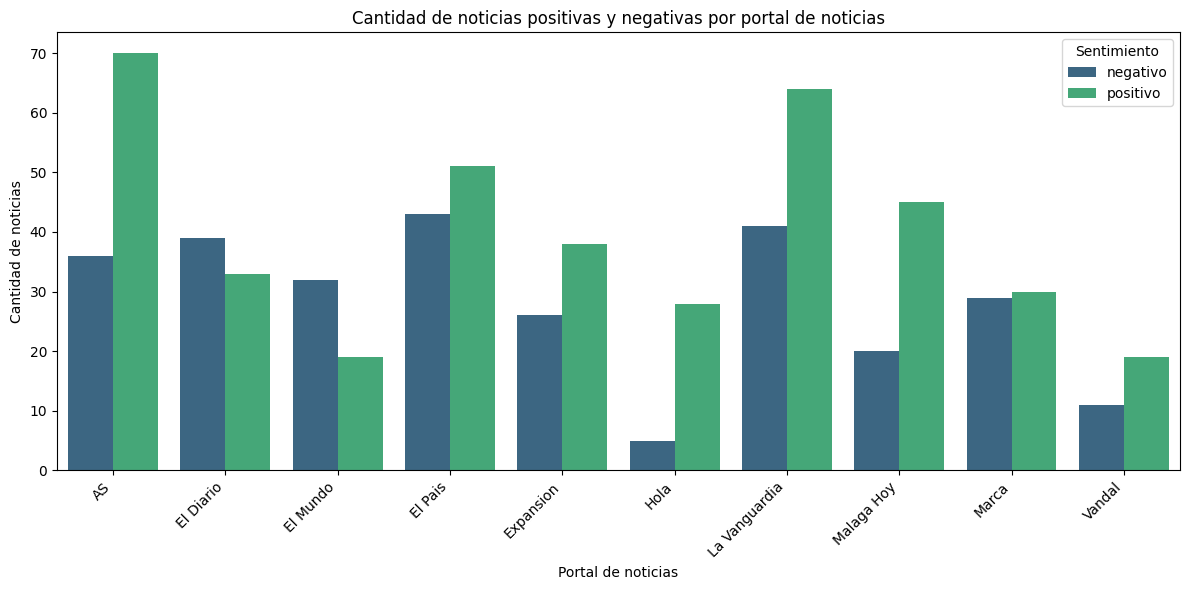

In [30]:
# Contar la cantidad de noticias positivas y negativas por portal
sentimientos_por_pagina = df.groupby(["Pagina", "Sentimiento"])["Sentimiento"].count().reset_index(name="Cantidad")

# Filtrar para incluir solo "positivo" y "negativo"
sentimientos_por_pagina = sentimientos_por_pagina[sentimientos_por_pagina["Sentimiento"].isin(["positivo", "negativo"])]

# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.barplot(x="Pagina", y="Cantidad", hue="Sentimiento", data=sentimientos_por_pagina, palette="viridis") # original = palette={"positivo": "green", "negativo": "red" otro bueno = palette="viridis"
plt.xticks(rotation=45, ha='right')
plt.title("Cantidad de noticias positivas y negativas por portal de noticias")
plt.xlabel("Portal de noticias")
plt.ylabel("Cantidad de noticias")
plt.tight_layout()
plt.show()

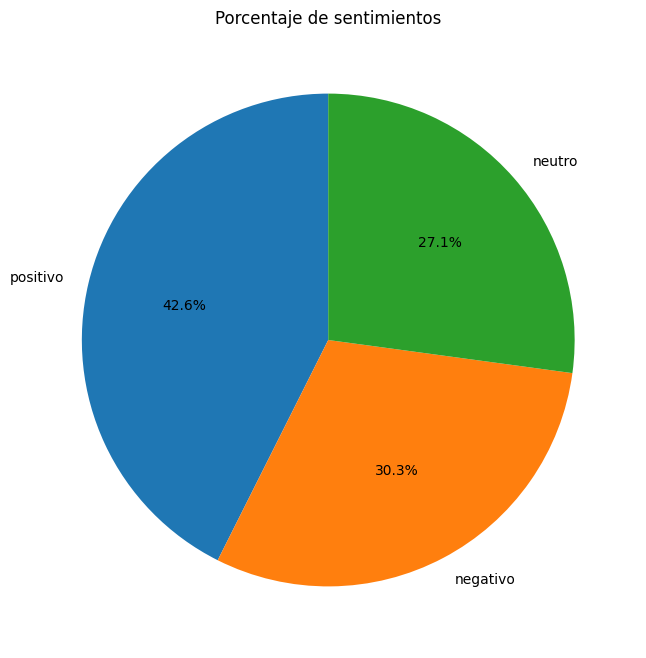

In [17]:
# Gráfico circular con porcentaje
sentimientos_counts = df['Sentimiento'].value_counts()  # Cuenta los sentimientos
plt.figure(figsize=(8, 8))  # Ajusta el tamaño de la figura si es necesario
plt.pie(sentimientos_counts, labels=sentimientos_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de sentimientos')
plt.show()